<a href="https://colab.research.google.com/github/Vamshi-3011/MINI-PROJECT/blob/main/MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
# mini project on image classification
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
target = []
images = []
flat_data = []
DATADIR = '/content/drive/MyDrive/images/photos'
CATEGORIES = ['FLOWERS','FRUITS']
for category in CATEGORIES :
  label = CATEGORIES.index(category)
  print(label)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resize = resize(img_array,(100,100,3))
    flat_data.append(img_resize.flatten())
    images.append(img_resize)
    target.append(label)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)
   




0
1


In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
flat_data

array([[0.0745098 , 0.09411765, 0.20784314, ..., 0.05882353, 0.10588235,
        0.20784314],
       [0.97254902, 0.81284392, 0.44564706, ..., 0.20641255, 0.41345098,
        0.0202149 ],
       [0.66666667, 0.82745098, 0.81176471, ..., 0.98039216, 0.94019608,
        0.98921569],
       ...,
       [0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
        0.99607843],
       [0.88627451, 0.90196078, 0.91372549, ..., 0.9947451 , 0.9947451 ,
        0.9947451 ],
       [0.56807843, 0.62780078, 0.34188235, ..., 0.4085851 , 0.45846745,
        0.45431059]])

In [134]:
flat_data.shape

(80, 30000)

In [135]:
flat_data[0]

array([0.0745098 , 0.09411765, 0.20784314, ..., 0.05882353, 0.10588235,
       0.20784314])

In [136]:
np.unique(target,return_counts=True)

(array([0, 1]), array([40, 40]))

2500

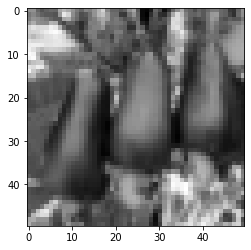

In [137]:
#converting to gray mode
from skimage.color import rgb2gray
img_resize = resize(img_array,(50,50))
img_gray = rgb2gray(img_resize)
plt.imshow(img_gray,cmap='gray')
img_gray.size

In [138]:
df = pd.DataFrame(flat_data)
df['Target'] = target
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,29961,29962,29963,29964,29965,29966,29967,29968,29969,29970,29971,29972,29973,29974,29975,29976,29977,29978,29979,29980,29981,29982,29983,29984,29985,29986,29987,29988,29989,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999,Target
0,0.074510,0.094118,0.207843,0.074510,0.094118,0.209137,0.074510,0.094118,0.211765,0.074510,0.094118,0.214784,0.074510,0.094118,0.219608,0.074510,0.094118,0.223529,0.070588,0.094118,0.219608,0.070588,0.094118,0.219608,0.074000,0.097529,0.223020,0.074510,0.098039,0.231373,0.074510,0.098039,0.231373,0.074510,0.098039,0.231373,0.082353,0.101961,0.235294,0.078549,...,0.064118,0.125882,0.211765,0.058824,0.105882,0.209922,0.058824,0.105882,0.207843,0.058824,0.105882,0.207843,0.054902,0.105882,0.207843,0.058824,0.105882,0.207843,0.058824,0.105882,0.207843,0.058824,0.105882,0.207843,0.058824,0.105882,0.207843,0.058824,0.105882,0.207843,0.058824,0.105882,0.207843,0.058824,0.105882,0.207843,0.058824,0.105882,0.207843,0
1,0.972549,0.812844,0.445647,0.984314,0.810627,0.437395,0.980980,0.723192,0.415686,0.992157,0.805319,0.432770,0.988235,0.591360,0.319569,0.986824,0.405294,0.317961,0.992157,0.399294,0.325490,0.992157,0.599294,0.335843,0.988235,0.749798,0.338033,0.988235,0.668162,0.326235,0.992157,0.282000,0.211647,0.992157,0.230119,0.221020,0.988235,0.312824,0.271020,0.988235,...,0.354353,0.456863,0.233686,0.329412,0.552665,0.336824,0.256389,0.487762,0.243255,0.271760,0.493691,0.252392,0.374555,0.554431,0.199026,0.771961,0.772627,0.227106,0.925176,0.855167,0.202000,0.729854,0.729462,0.209322,0.304863,0.448733,0.134824,0.279843,0.397490,0.039216,0.266667,0.427451,0.035294,0.236431,0.431373,0.043137,0.206413,0.413451,0.020215,0
2,0.666667,0.827451,0.811765,0.686275,0.841176,0.830392,0.750980,0.874510,0.888235,0.821569,0.909804,0.935294,0.868627,0.937255,0.966667,0.901961,0.952941,0.982353,0.925490,0.960784,0.988235,0.937255,0.964706,0.992157,0.933333,0.964706,0.992157,0.925490,0.960784,0.988235,0.909804,0.954902,0.988235,0.884314,0.939216,0.974510,0.845098,0.911765,0.949020,0.813725,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.992157,0.969608,0.993137,0.980392,0.940196,0.989216,0
3,0.992157,0.862745,0.843137,0.992157,0.862745,0.843137,0.992157,0.862745,0.843137,0.992157,0.862745,0.843137,0.992157,0.862745,0.843137,0.992157,0.862745,0.843137,0.992157,0.862745,0.843137,0.992157,0.862745,0.843137,0.992157,0.862745,0.843137,0.992157,0.862745,0.843137,0.992157,0.862745,0.843137,0.992157,0.862745,0.843137,0.992157,0.862745,0.843137,0.992157,...,0.992157,0.862745,0.843137,0.992157,0.862745,0.843137,0.992157,0.862745,0.843137,0.992157,0.862745,0.843137,0.992157,0.862745,0.843137,0.992157,0.862745,0.843137,0.992157,0.862745,0.843137,0.992157,0.862745,0.843137,0.992157,0.862745,0.843137,0.992157,0.862745,0.843137,0.992157,0.862745,0.843137,0.992157,0.862745,0.843137,0.992157,0.862745,0.843137,0
4,0.537255,0.458824,0.466667,0.537255,0.462745,0.466667,0.537255,0.466667,0.466667,0.537255,0.466667,0.462745,0.534078,0.470588,0.458824,0.529412,0.470588,0.454902,0.525490,0.474510,0.450980,0.521569,0.474510,0.443137,0.517647,0.470588,0.435294,0.509804,0.466667,0.423529,0.513725,0.450980,0.431373,0.537255,0.431373,0.462745,0.564706,0.407843,0.482353,0.622627,...,0.282353,0.390000,0.258824,0.282353,0.384314,0.235294,0.290196,0.360431,0.215686,0.294863,0.329412,0.180392,0.305882,0.330588,0.149020,0.325490,0.362941,0.160784,0.341451,0.410706,0.192157,0.360784,0.458824,0.223176,0.373294,0.478471,0.231412,0.384314,0.486275,0.235294,0.380588,0.490196,0.231373,0.376471,0.490196,0.227451,0.369020,0.486275,0.207843,0
...,...,...,...,...,...,...,...,...,...,...,...,.

In [139]:
# splitting data into train data and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                       test_size=0.3,random_state=98)

In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)              


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [141]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1])

In [142]:
y_test

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1])

In [143]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [144]:
accuracy_score(y_pred,y_test)

0.8333333333333334

In [145]:
confusion_matrix(y_pred,y_test)

array([[11,  2],
       [ 2,  9]])

In [146]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.82      0.82      0.82        11

    accuracy                           0.83        24
   macro avg       0.83      0.83      0.83        24
weighted avg       0.83      0.83      0.83        24



In [147]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [148]:
model = pickle.load(open('img_model.p','rb'))

enter your URLhttps://www.ikea.com/in/en/images/products/smycka-artificial-flower-rose-red__0903311_pe596728_s5.jpg?f=s
(600, 600, 3)
PREDICTED OUTPUT: FLOWERS


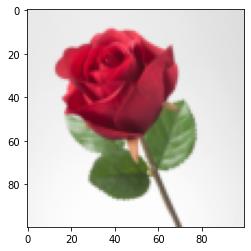

In [149]:
flat_data = []
url = input('enter your URL')
img = imread(url)
img_resize = resize(img,(100,100,3)) 
flat_data.append(img_resize.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resize)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')